# Predicting Lower Back Pain Symptoms with the k-NN


---



***Database import***

*Source : *https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [1]:
import pandas as pd

data = pd.read_csv('../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


**Removal of the last field**

In [2]:
data = data[[i for i in data.columns if i not in ['Unnamed: 13'] ]]
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


***Modification of values*** 

Only the last column was modified :

*   If Class_att = Abnormal then 1
*   Else 0 



In [3]:
data.Class_att.replace(['Abnormal', 'Normal'], [1, 0], inplace=True)
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


***Renaming of the columns***

In [4]:
data = data.rename(columns = {'Col1':'pelvic_incidence','Col2':'pelvic_tilt', 'Col3':'lumbar_lordosis_angle', 'Col4':'sacral_slope', 'Col5':'pelvic_radius', 'Col6':'degree_spondylolisthesis', 'Col7':'pelvic_slope', 'Col8':'Direct_tilt', 'Col9':'thoracic_slope', 'Col10':'cervical_tilt', 'Col11':'sacrum_angle', 'Col12':'scoliosis_slope', 'Class_att':'Pain'})
data.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Pain
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


***Normal/Abnormal Distribution***

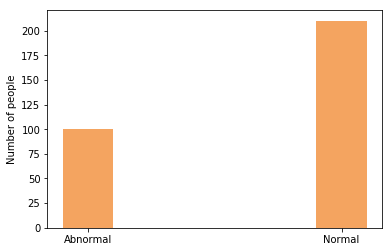

In [5]:
import matplotlib.pyplot as plt

abnormal= len(data[data['Pain']==0])
normal= len(data[data['Pain']==1])

y= [abnormal,normal]
x= ['Abnormal','Normal']

plt.xlabel('')
plt.ylabel('Number of people')
plt.bar(x,y, color ='sandybrown',width=0.20)
plt.show()

***Creating of the samples***

In [6]:
from sklearn.model_selection import train_test_split
y = 'Pain'
X = [c for c in list(data) if c not in [y]]
X_data = data[X]
y_data = data[[y]]

xtrain, xtest, ytrain, ytest = train_test_split(X_data, y_data, train_size=0.7, random_state=1)

**Application of the algorithm**

The objective is to find the optimal value of neighbors.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

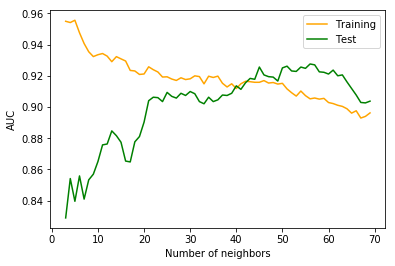


The optimal value is 56


In [7]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

test = []
train=[]


x = list(np.arange(3,70,1))


for i in x :
  model= KNeighborsClassifier(n_neighbors=i,metric ='minkowski', p = 1, algorithm ='kd_tree', n_jobs =-1)
  model.fit(xtrain, ytrain)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest)[:,1])
  auc_test = metrics.auc(fpr,tpr)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), model.predict_proba(xtrain)[:,1])
  auc_train = metrics.auc(fpr,tpr)
  test.append(auc_test)
  train.append(auc_train)



best_value = x[test.index(max(test))]

plt.plot(x,train, color="orange",  label='Training')
plt.plot(x,test, color="green",  label='Test') 



plt.xlabel('Number of neighbors')
plt.ylabel('AUC')
plt.legend()


plt.show()

print()
print('The optimal value is ' + str(best_value))

In [8]:
model= KNeighborsClassifier(n_neighbors=best_value,metric ='minkowski', p = 1, algorithm ='kd_tree', n_jobs =-1)
model.fit(xtrain, ytrain)

# AUC
fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest)[:,1])
auc = metrics.auc(fpr,tpr)

# Accuracy

accuracy = model.score(xtest, ytest)

print('Number of neighbors : ' + str(best_value))
print()
print('AUC : ' + str(auc))
print()
print('Accuracy : ' + str(accuracy))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Number of neighbors : 56

AUC : 0.9276094276094277

Accuracy : 0.7956989247311828
